# Music genre recommedation system

In [2]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [3]:
random_file_name = "./blues.00000.wav"

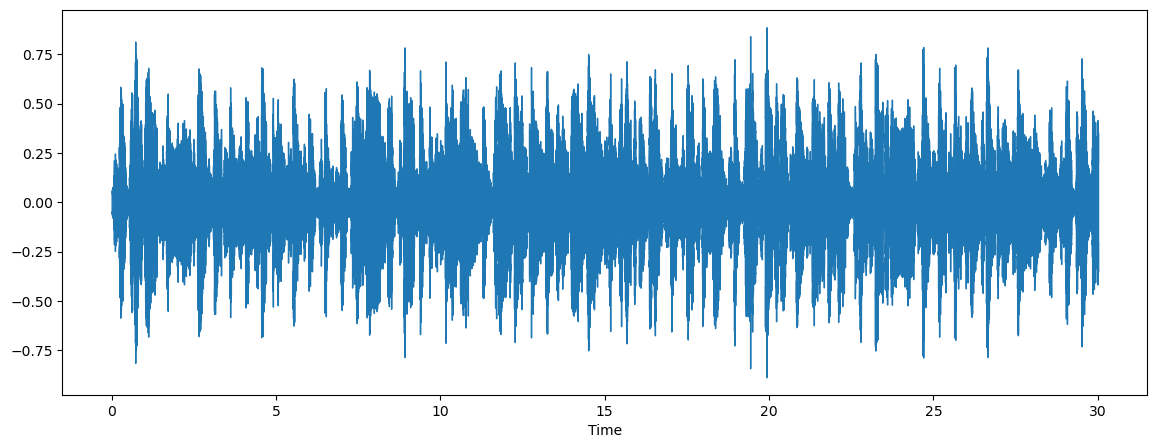

In [4]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [5]:
y.shape


(1323588,)

# Playing audio

In [6]:
from IPython.display import Audio
Audio(data=y,rate=sr)

In [7]:
y


array([ 0.00734921,  0.01335782,  0.01657648, ..., -0.07293833,
       -0.06308185, -0.03151622], dtype=float32)

# Visulazing the chunks of the audio

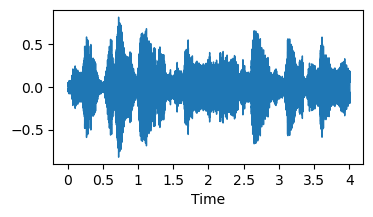

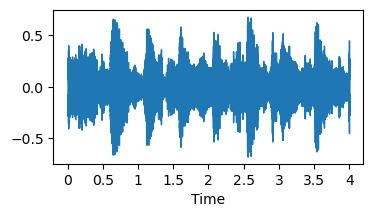

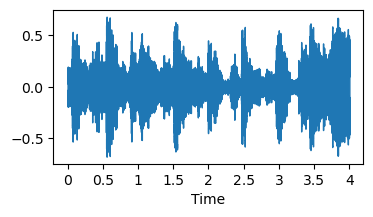

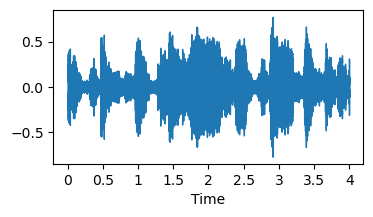

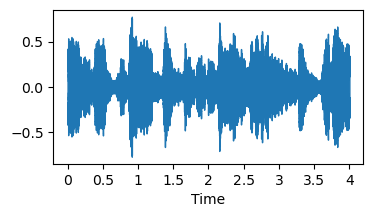

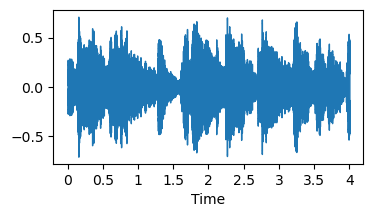

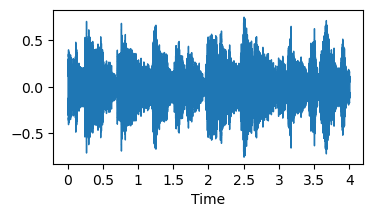

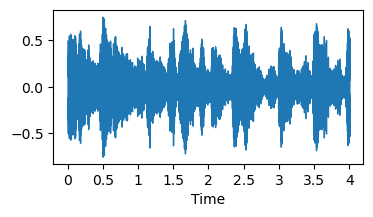

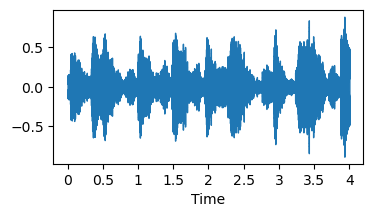

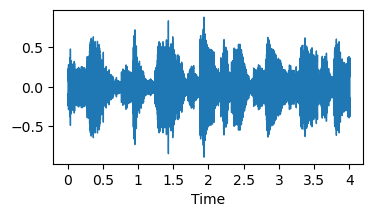

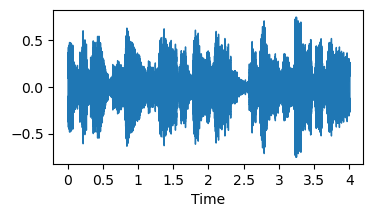

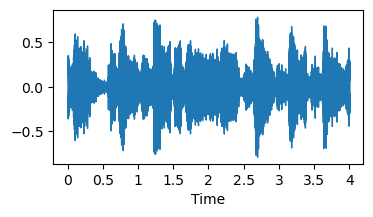

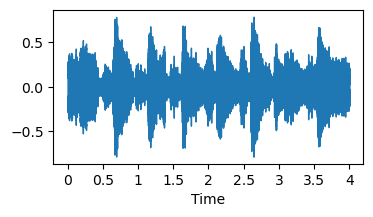

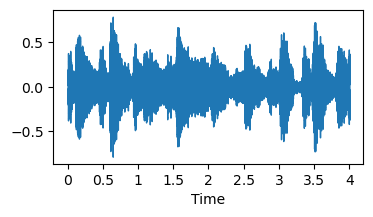

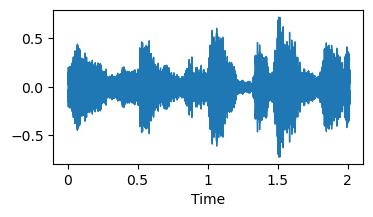

In [8]:
Audio_path = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=None) #sr=none to keep original sample rate

#define the duration of each chunk and overlap
chunk_duration = 4
overlap_duration = 2

#convert duration to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#calculate the number of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

#iterate 
for i in range (num_chunks):
    start = i*(chunk_samples-overlap_samples)
    end = start+chunk_samples
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

## Melspectogram visulization


In [9]:
#Plotting melspectogram for entire audio
# Plotting mel spectrogram for entire audio
def plot_melespectrogram(y, sr):
    # Compute mel spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel Spectrogram")
    plt.tight_layout()
    plt.show()

In [10]:
random_file_name = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)


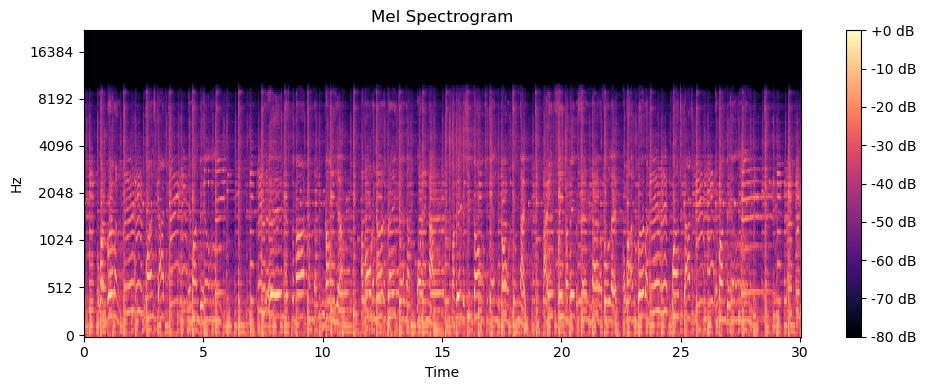

In [11]:
plot_melespectrogram(y, sr)

In [12]:
def plot_melspectogram_chunks(y,sr):
    chunk_duration = 4
    overlap_duration = 2
    
    #convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate 
    for i in range (num_chunks):
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        chunk = y[start:end]
        spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        #visualize
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title("Mel Spectrogram")
        plt.tight_layout()
        plt.show()
        
    

In [13]:
random_file_name = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)


(128, 345)


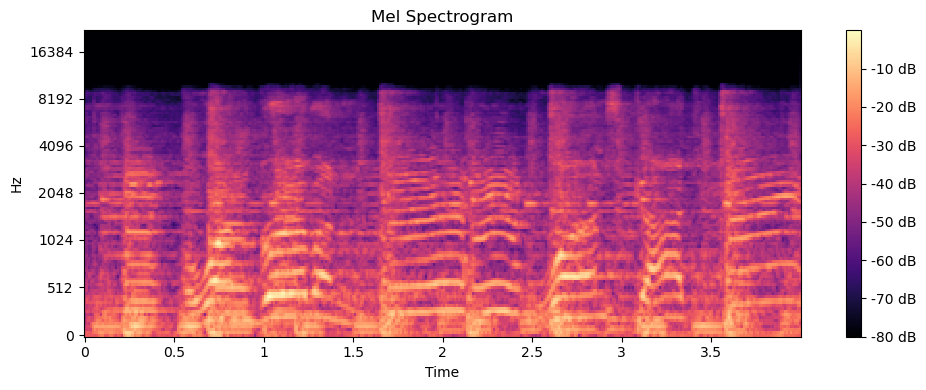

(128, 345)


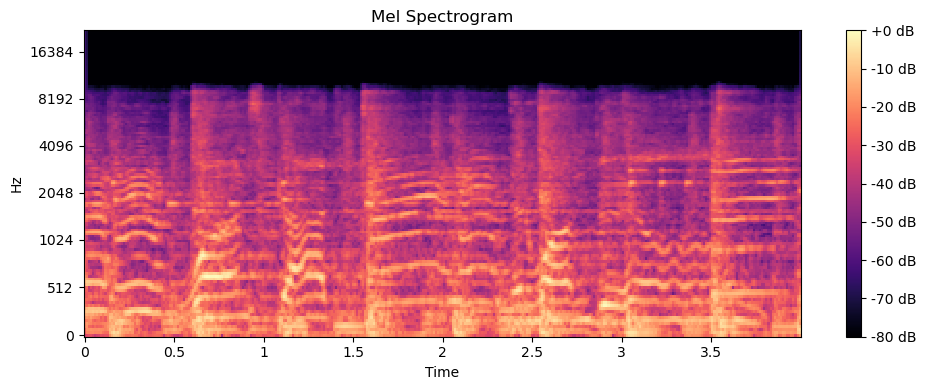

(128, 345)


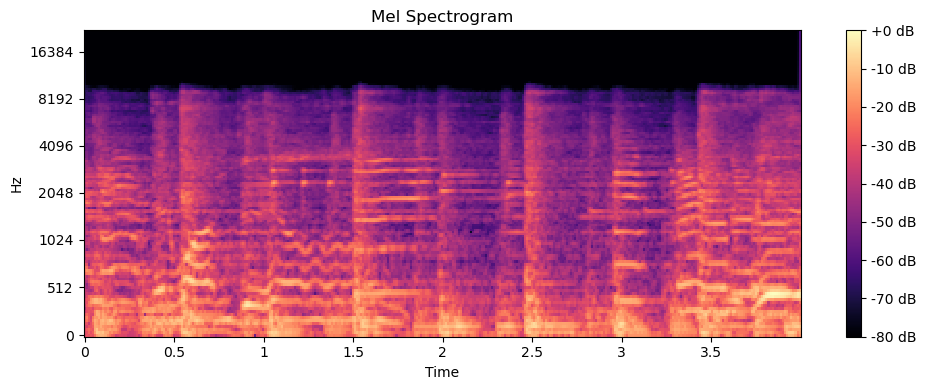

(128, 345)


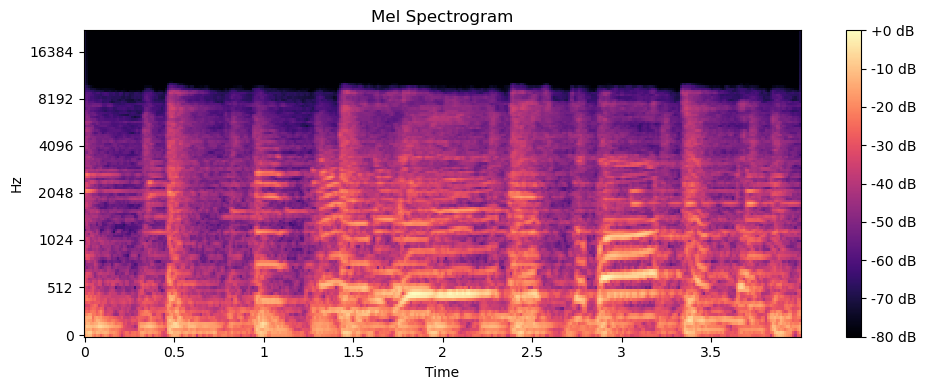

(128, 345)


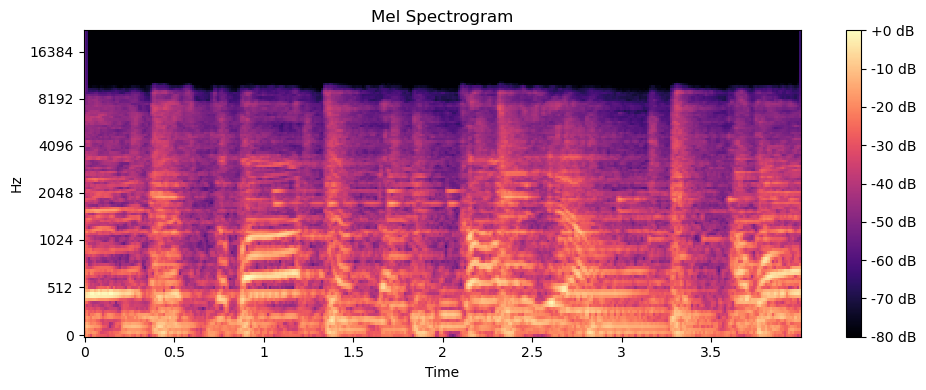

(128, 345)


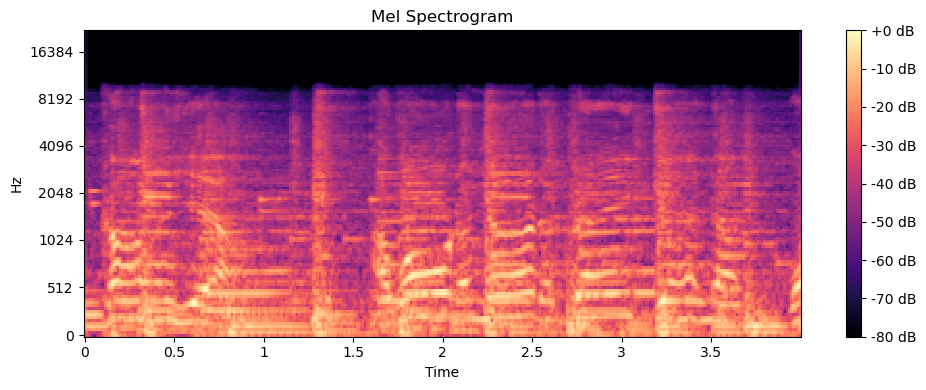

(128, 345)


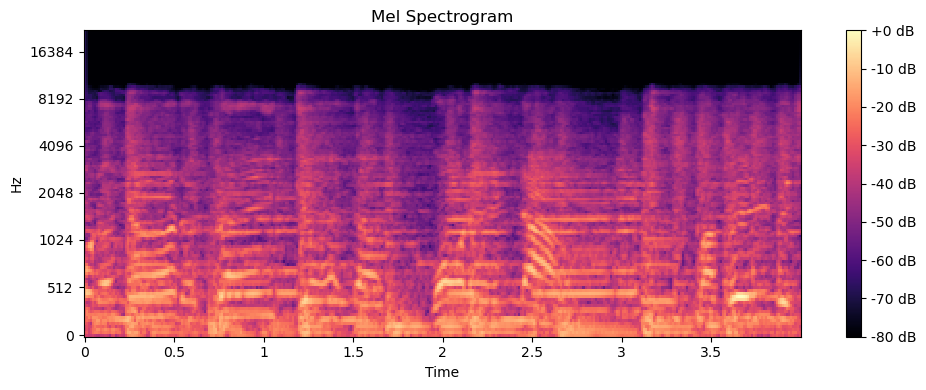

(128, 345)


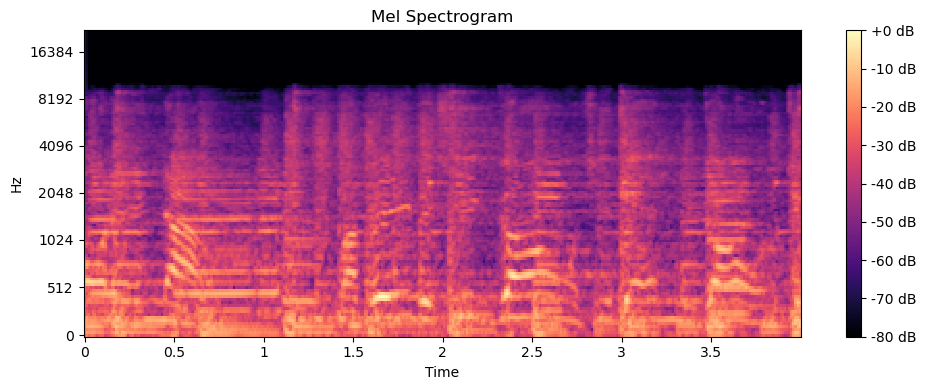

(128, 345)


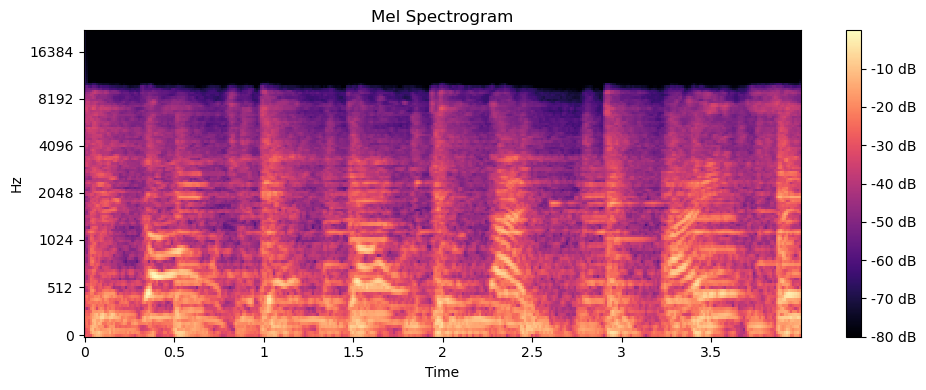

(128, 345)


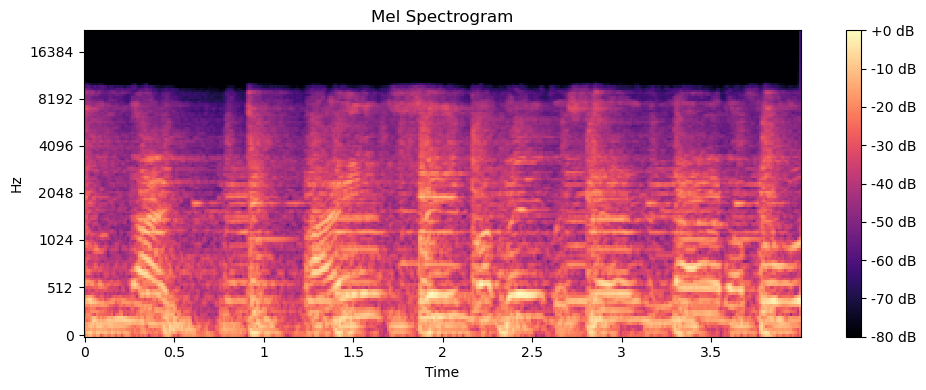

(128, 345)


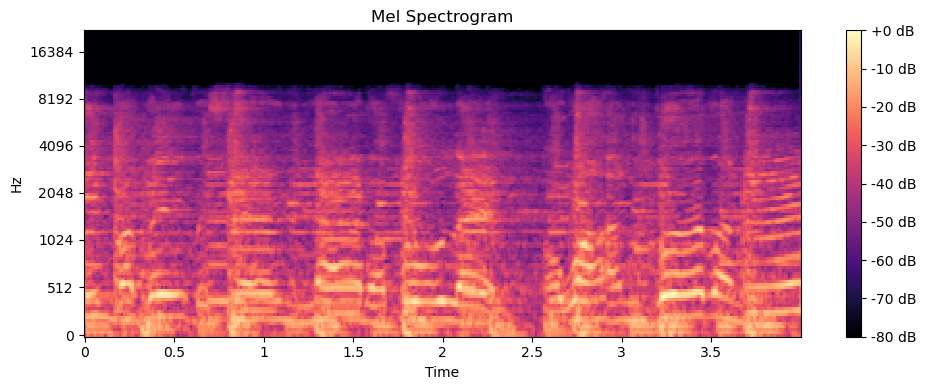

(128, 345)


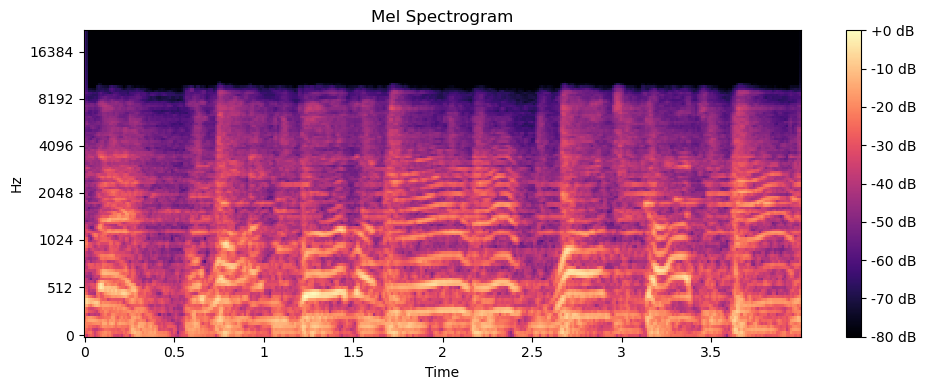

(128, 345)


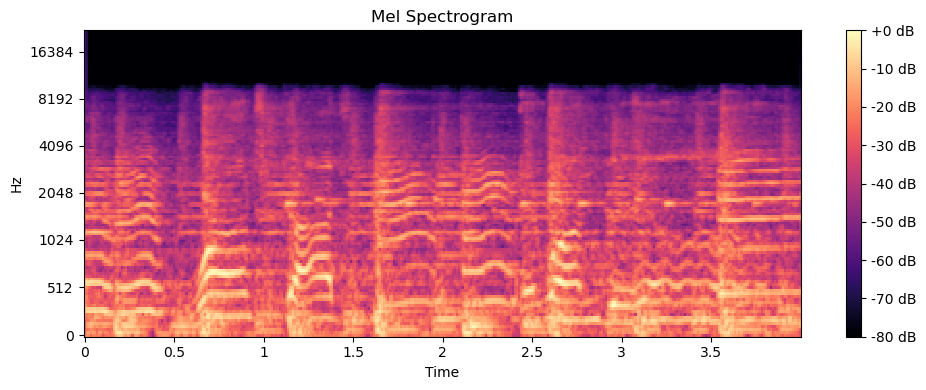

(128, 345)


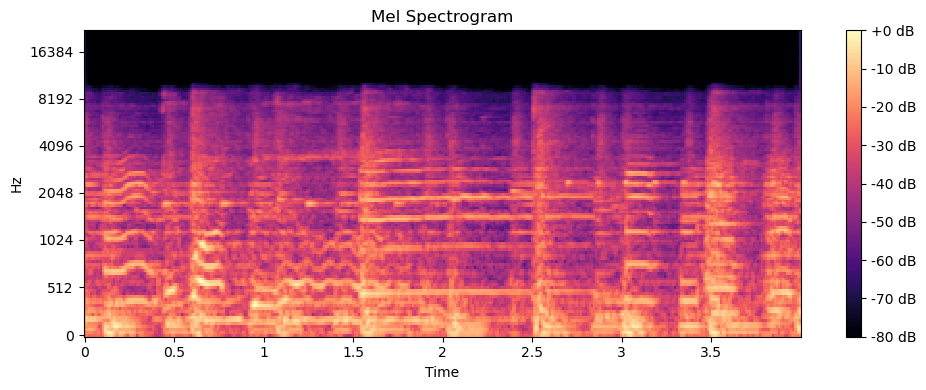

(128, 174)


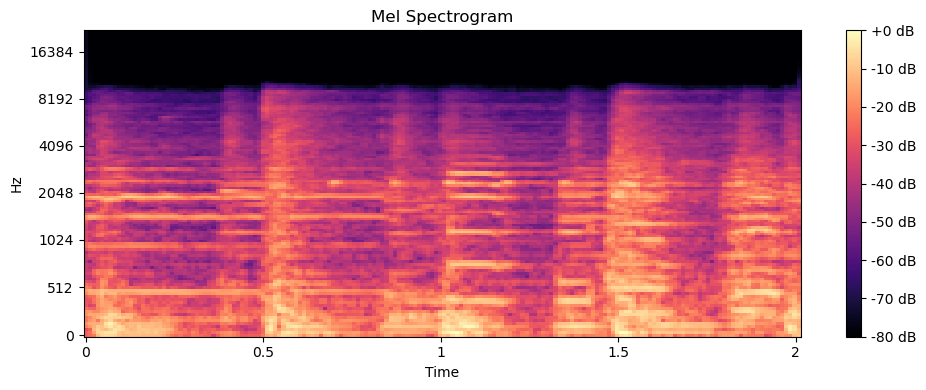

In [14]:
plot_melspectogram_chunks(y,sr)

In [15]:
#defining folder structure
data_dir = "./genres_original"
classes = [ 'blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [16]:
from tensorflow.image import resize
#load and preprocess audio data
def loading_preprocessing(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Preprocessing---",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue
              
                chunk_duration = 4
                overlap_duration = 2
                
                #convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate 
                for i in range (num_chunks):
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    chunk = audio_data[start:end]
                    spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                
                #Resize matrix based on target shape
                    spectrogram = resize(np.expand_dims(spectrogram,axis=-1),target_shape)
                    data.append(spectrogram)
                    labels.append(i_class)

    return np.array(data),np.array(labels)
    

In [17]:
data,labels = loading_preprocessing(data_dir,classes)

Preprocessing--- blues
Preprocessing--- classical
Preprocessing--- country
Preprocessing--- disco
Preprocessing--- hiphop
Preprocessing--- jazz
Preprocessing--- metal
Preprocessing--- pop
Preprocessing--- reggae
Preprocessing--- rock


In [19]:
data.shape

(14975, 150, 150, 1)

In [20]:
from tensorflow.keras.utils import to_categorical 
labels = to_categorical(labels,num_classes = len(classes)) #converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
labels.shape

(14975, 10)

## Splitting dataset into training and test set 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)


In [23]:
X_train.shape

(11980, 150, 150, 1)

In [24]:
X_test.shape

(2995, 150, 150, 1)

In [25]:
Y_train.shape

(11980, 10)

In [26]:
Y_test.shape

(2995, 10)

# Building model

In [27]:
model = tf.keras.models.Sequential()

In [26]:
X_train[0].shape

(150, 150, 1)

In [27]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [28]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [29]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [30]:
model.add(Dropout(0.3))

In [31]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Dropout(0.3))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(units=1200,activation='relu'))

In [36]:
model.add(Dropout(0.45))

In [37]:
#output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [51]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.save("Trained_model.keras")

In [54]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

# Model evaluation- I

In [28]:
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [30]:
!pip install pydot

In [66]:
#reloading Training history
import json 
with open("training_hist.json",'r') as json_file:
     training_history_data = json.load(json_file)

In [67]:
#Evaluation on training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 [==============================] - 87s 232ms/step - loss: 0.0089 - accuracy: 0.9968


In [70]:
train_loss,train_accuracy

(0.008885610848665237, 0.996828019618988)

In [71]:
#Model evaluation on validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 [==============================] - 21s 224ms/step - loss: 0.3612 - accuracy: 0.9095


In [72]:
val_loss,val_accuracy 

(0.36120113730430603, 0.9095158576965332)

In [73]:
training_history_data['loss']

[2.04414439201355,
 1.4952642917633057,
 1.181951880455017,
 0.9971982836723328,
 0.8439061045646667,
 0.7152147889137268,
 0.625395655632019,
 0.5331851243972778,
 0.4362926185131073,
 0.36804428696632385,
 0.3324230909347534,
 0.28731462359428406,
 0.23576566576957703,
 0.20344886183738708,
 0.1910889893770218,
 0.17286115884780884,
 0.1369156390428543,
 0.11860688030719757,
 0.12269094586372375,
 0.11341264098882675,
 0.10235651582479477,
 0.09678223729133606,
 0.07576985657215118,
 0.09164571017026901,
 0.07609838992357254,
 0.08299942314624786,
 0.06942640990018845,
 0.05781461298465729,
 0.08085852861404419,
 0.06501983851194382]

# Accuracy and loss Visualization

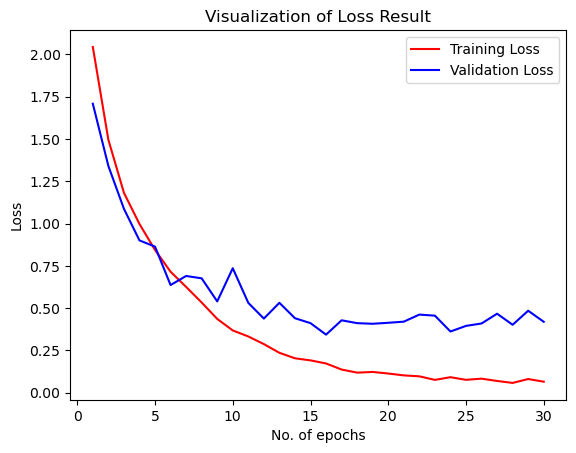

In [74]:
#Visualization of loss
epochs = [i for i in range (1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of epochs")
plt.ylabel('Loss')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

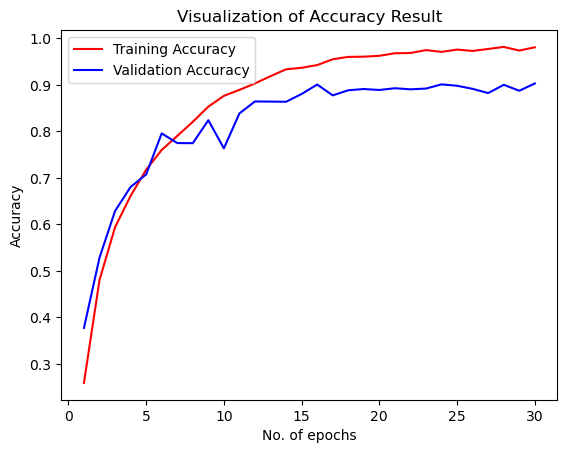

In [75]:
#Visualization of Accuracy
epochs = [i for i in range (1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of epochs")
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Prescise,Recall,Confusion Matrix- Model Evaluation-II

In [76]:
X_test.shape

(2995, 150, 150, 1)

In [77]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 21s 226ms/step


array([[1.01765116e-04, 2.46140655e-08, 9.27627087e-01, ...,
        7.04635829e-02, 1.80809860e-04, 1.35763444e-03],
       [7.10577019e-09, 1.11886678e-09, 2.10776392e-07, ...,
        2.01609798e-10, 2.37064324e-09, 8.24147183e-03],
       [1.04346527e-05, 5.16168370e-07, 1.29161044e-05, ...,
        1.64490700e-06, 1.28204363e-06, 5.54871699e-03],
       ...,
       [9.99999523e-01, 2.23746737e-12, 5.47821948e-08, ...,
        3.89707667e-12, 1.97614185e-07, 1.26744197e-08],
       [3.10446104e-08, 9.99987721e-01, 5.53874564e-08, ...,
        1.00522385e-07, 2.47142765e-07, 1.35502006e-07],
       [2.40016154e-26, 1.19835235e-35, 3.84714666e-38, ...,
        8.00609388e-17, 1.54877354e-27, 2.01994975e-28]], dtype=float32)

In [78]:
y_pred.shape

(2995, 10)

In [79]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories


array([2, 6, 6, ..., 0, 1, 4])

In [80]:
true_categories = np.argmax(Y_test,axis=1)
true_categories


array([7, 6, 6, ..., 0, 1, 4])

In [81]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [82]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_categories,predicted_categories)
#Precision recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))


              precision    recall  f1-score   support

       blues       0.95      0.86      0.90       302
   classical       0.94      0.96      0.95       298
     country       0.87      0.87      0.87       317
       disco       0.93      0.93      0.93       312
      hiphop       0.88      0.96      0.92       277
        jazz       0.91      0.93      0.92       311
       metal       0.89      0.99      0.94       302
         pop       0.95      0.91      0.93       289
      reggae       0.95      0.84      0.89       296
        rock       0.83      0.86      0.84       291

    accuracy                           0.91      2995
   macro avg       0.91      0.91      0.91      2995
weighted avg       0.91      0.91      0.91      2995



# Confusion matrix visualization

In [83]:
cm

array([[260,   1,  11,   4,   3,   3,   2,   3,   5,  10],
       [  1, 285,   1,   0,   0,  10,   0,   0,   0,   1],
       [  6,   1, 276,   4,   0,   6,   3,   1,   6,  14],
       [  0,   0,   3, 289,   5,   0,   5,   3,   1,   6],
       [  0,   1,   0,   0, 266,   1,   2,   4,   1,   2],
       [  4,  11,   4,   0,   0, 288,   1,   0,   0,   3],
       [  0,   0,   0,   0,   1,   0, 298,   0,   0,   3],
       [  1,   1,   5,   2,   9,   1,   1, 263,   0,   6],
       [  1,   2,   7,   8,  16,   3,   2,   1, 249,   7],
       [  0,   1,  10,   3,   2,   3,  20,   2,   0, 250]])

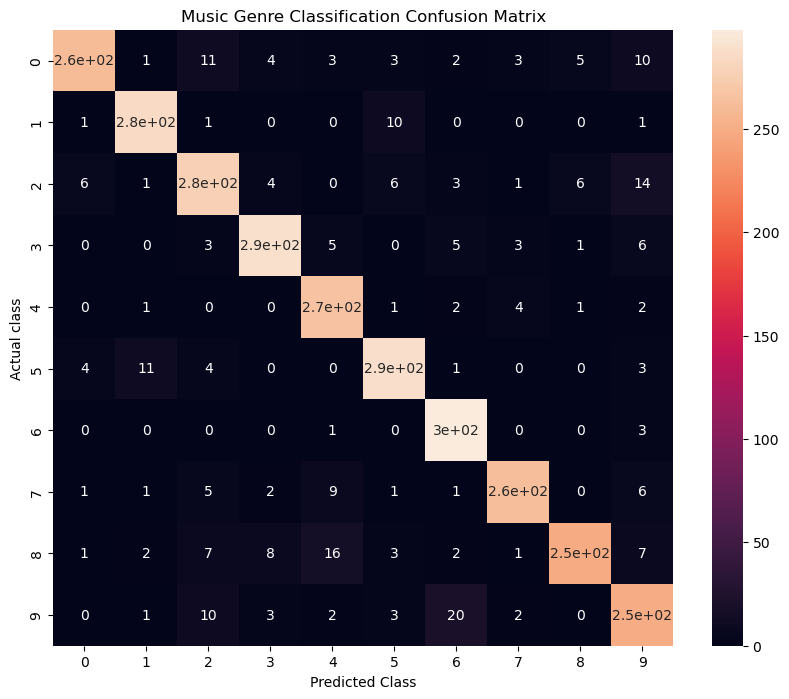

In [94]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.title("Music Genre Classification Confusion Matrix")
plt.show()